# Question 3.7 Task (b)


In [11]:
import config as c
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

from plots import plot_diff_times

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [12]:
Us = []
n_sim = 40+1 # amounts of simulation that will be done
# center and sides define the interval in which V_appl is varied (linear)
center = -46.9 * c.milli 
sides = 0.05 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values in mV:",v_values/c.milli)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler))

v_values in mV: [-46.95   -46.9475 -46.945  -46.9425 -46.94   -46.9375 -46.935  -46.9325
 -46.93   -46.9275 -46.925  -46.9225 -46.92   -46.9175 -46.915  -46.9125
 -46.91   -46.9075 -46.905  -46.9025 -46.9    -46.8975 -46.895  -46.8925
 -46.89   -46.8875 -46.885  -46.8825 -46.88   -46.8775 -46.875  -46.8725
 -46.87   -46.8675 -46.865  -46.8625 -46.86   -46.8575 -46.855  -46.8525
 -46.85  ]


V_appl = -46.85 mV


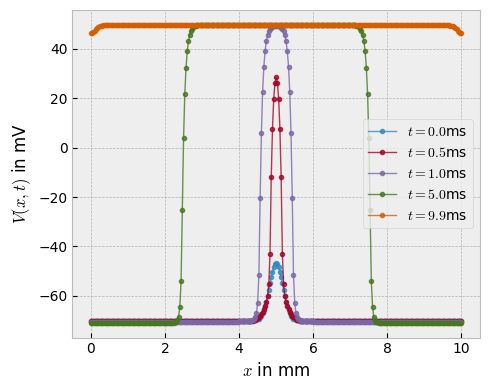

In [13]:
ts = [0,50,100,500,c.n_t-10]
filename = "v_appl_high"

for i_v_appl in [40]:
    U = Us[i_v_appl]
    print(f"V_appl = {v_values[i_v_appl]/c.milli:.2f} mV")
    plot_diff_times(
        U,
        t_diff_times=ts,
        log=False,
        alpha=0.8,
        legend=True,
        filename=filename
        )

0.00999


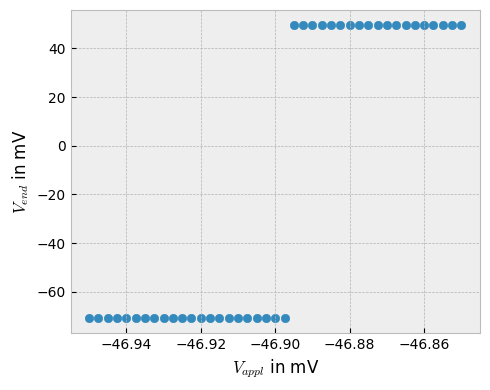

0 -70.8724222993362 -46.949999999999996
1 -70.87233899822881 -46.9475
2 -70.87225172725536 -46.945
3 -70.87216006555592 -46.942499999999995
4 -70.87206352147842 -46.94
5 -70.87196151575353 -46.9375
6 -70.8718533593543 -46.934999999999995
7 -70.87173822388912 -46.9325
8 -70.8716151012885 -46.93
9 -70.87148274777672 -46.927499999999995
10 -70.87133960415132 -46.92499999999999
11 -70.87118367923637 -46.9225
12 -70.87101237400434 -46.919999999999995
13 -70.87082220599069 -46.9175
14 -70.8706083574332 -46.915
15 -70.87036389180295 -46.912499999999994
16 -70.8700782958712 -46.91
17 -70.86973450340862 -46.9075
18 -70.8693019929743 -46.904999999999994
19 -70.86871744596806 -46.902499999999996
20 -70.86780998375977 -46.9
21 -70.86566741784104 -46.897499999999994
22 49.72623574144469 -46.894999999999996
23 49.72623574144469 -46.8925
24 49.72623574144469 -46.88999999999999
25 49.72623574144469 -46.887499999999996
26 49.72623574144469 -46.885
27 49.72623574144469 -46.88249999999999
28 49.726235741

In [14]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print(i_t*c.delta_t)
for U in Us:

    endvoltages += [U[i_t,int(c.x_0/c.delta_x)]]

plt.style.use('bmh')
fig = plt.figure(figsize=(5,4))
plt.scatter(v_values/c.milli,np.array(endvoltages)/c.milli)
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
#plt.legend()
plt.savefig("images/v_end_vs_v_appl.pdf")
plt.show()
for i in range(len(endvoltages)):
    print(i,endvoltages[i]/c.milli,v_values[i]/c.milli)

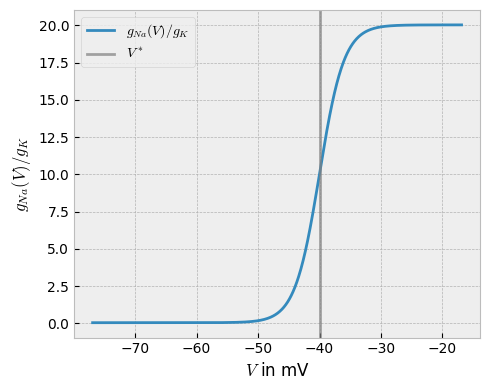

In [15]:
from opt_right_side_functions import g_na_g_k
sides = 30 * c.milli
x = np.linspace(center - sides, center + sides ,1000)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(5,4))
plt.plot(x/c.milli,g_na_g_k(x),label="$g_{Na}(V)/g_K$")
plt.ylabel("$g_{Na}(V)/g_K$")
plt.xlabel("$V$ in mV")
plt.tight_layout()
plt.axvline(c.v_star/c.milli,c="grey",label="$V^*$",alpha=0.7)
#plt.yscale("log")
plt.legend()
plt.savefig("images/g_na_vs_v.pdf")
plt.show()


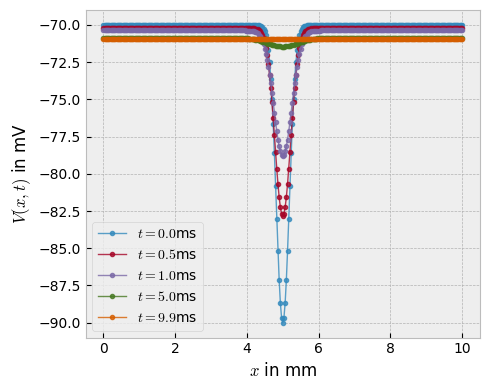

In [18]:
ts = [0,50,100,500,c.n_t-10]
filename = "v_appl_super_low"
inital_distr = inital_values(-90*c.milli)
U_low = solve_simulation(inital_distr,diags_gen_backwards_euler)
plot_diff_times(
        U_low,
        t_diff_times=ts,
        log=False,
        alpha=0.8,
        legend=True,
        filename=filename
        )